<a href="https://www.kaggle.com/code/dgb9716/apple-sales-dataset-2024-data-analysis?scriptVersionId=219966355" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-sales-dataset-2024/apple_sales_2024.csv


# Ignore Warnings

In [2]:
warnings.simplefilter(action='ignore')

# Read CSV

In [3]:
df = pd.read_csv('/kaggle/input/apple-sales-dataset-2024/apple_sales_2024.csv')
df

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29
...,...,...,...,...,...,...,...
995,Mexico,Rest of World,29.86,10.30,7.40,9.60,18.56
996,Texas,North America,27.83,12.52,8.89,4.46,6.38
997,Germany,Europe,25.47,7.69,7.90,6.90,15.00
998,Shenzhen,Greater China,15.34,8.81,8.24,8.78,15.49


# Data Understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            1000 non-null   object 
 1   Region                           1000 non-null   object 
 2   iPhone Sales (in million units)  1000 non-null   float64
 3   iPad Sales (in million units)    1000 non-null   float64
 4   Mac Sales (in million units)     1000 non-null   float64
 5   Wearables (in million units)     1000 non-null   float64
 6   Services Revenue (in billion $)  1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


In [5]:
df[['State', 'Region']] = df[['State', 'Region']].astype('string')

In [6]:
df.describe(include='all')

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
count,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
unique,25,5,NaN,NaN,NaN,NaN,NaN
top,Hong Kong,Rest of World,NaN,NaN,NaN,NaN,NaN
freq,50,221,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,17.444500,8.565880,5.555760,6.935500,12.447130
std,NaN,NaN,7.180077,3.735994,2.506491,2.951677,4.306347
min,NaN,NaN,5.030000,2.020000,1.010000,2.000000,5.010000
25%,NaN,NaN,11.447500,5.432500,3.470000,4.330000,8.710000
50%,NaN,NaN,17.130000,8.695000,5.550000,6.815000,12.205000
75%,NaN,NaN,23.715000,11.740000,7.730000,9.532500,16.252500


# Data Preparation

In [7]:
df_numerical = df.drop(['Region', 'State'], axis=1)

# Exploratory Data Analysis (EDA)

In [8]:
print(df['State'].unique())
print(df['Region'].unique())

<StringArray>
[   'Chongqing',      'Germany',           'UK',     'Shanghai',
     'Thailand',     'New York',       'Mexico',        'Italy',
    'Hong Kong',       'Canada',        'Japan',        'Spain',
    'Australia',      'Beijing',        'India',        'Texas',
   'California', 'South Africa',       'Brazil',      'Florida',
     'Illinois',  'South Korea',    'Indonesia',     'Shenzhen',
       'France']
Length: 25, dtype: string
<StringArray>
['Greater China', 'Europe', 'Rest of Asia', 'North America', 'Rest of World']
Length: 5, dtype: string


In [9]:
df.sort_values(by='Services Revenue (in billion $)', ascending=False)

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
235,Brazil,Rest of World,8.05,14.28,9.69,7.68,19.92
492,Beijing,Greater China,18.81,12.84,2.24,9.83,19.90
100,Japan,Rest of Asia,16.41,2.51,9.37,3.91,19.89
604,California,North America,12.08,6.74,4.70,8.32,19.88
356,Texas,North America,19.08,5.74,4.64,3.64,19.87
...,...,...,...,...,...,...,...
959,Brazil,Rest of World,15.80,7.83,1.76,10.19,5.08
303,Indonesia,Rest of Asia,10.43,2.11,5.41,3.73,5.08
179,Germany,Europe,22.89,14.29,3.96,10.72,5.05
471,Mexico,Rest of World,15.85,7.34,2.61,11.47,5.04


In [10]:
df_state = df.groupby(by=['State']).sum().drop('Region', axis=1)
display(df_state.sort_values(by='Services Revenue (in billion $)', ascending=False))

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
State,,,,,
Hong Kong,934.06,463.24,268.37,352.83,631.51
South Africa,831.40,364.50,263.37,326.40,600.22
California,843.34,459.86,250.88,345.03,591.67
UK,810.31,404.00,280.13,289.19,569.05
Canada,784.68,332.87,263.73,299.30,550.15
France,724.19,326.43,229.74,351.72,550.11
Shanghai,758.20,318.20,259.22,284.82,548.40
Australia,642.96,393.68,238.93,267.50,541.19
Chongqing,652.60,361.54,209.76,281.00,535.93


In [11]:
df_region = df.groupby(by=['Region']).sum().drop('State', axis=1)
display(df_region.sort_values(by='Services Revenue (in billion $)', ascending=False))

,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
Region,,,,,
Greater China,3868.28,1862.95,1212.80,1514.86,2780.72
Rest of World,3797.46,1858.57,1219.84,1498.31,2701.75
Europe,3563.12,1745.66,1111.22,1353.12,2416.30
North America,3124.14,1625.44,1028.96,1272.92,2281.21
Rest of Asia,3091.50,1473.26,982.94,1296.29,2267.15


In [12]:
highest_state = df_state['Services Revenue (in billion $)'].max() #Hong Kong
lowest_state = df_state['Services Revenue (in billion $)'].min() #Florida

print(f'Highest revenue by state: ${highest_state} billion USD.')
print(f'Lowest revenue by state: ${lowest_state} billion USD.')

Highest revenue by state: $631.51 billion USD.
Lowest revenue by state: $324.07 billion USD.


In [13]:
highest_region = df_region['Services Revenue (in billion $)'].max() #Greater China
lowest_region = df_region['Services Revenue (in billion $)'].min() #Rest of Asia

print(f'Highest revenue by region: ${highest_region} billion USD.')
print(f'Lowest revenue by region: ${lowest_region} billion USD.')

Highest revenue by region: $2780.72 billion USD.
Lowest revenue by region: $2267.15 billion USD.


In [14]:
total_revenue_by_state = df_state['Services Revenue (in billion $)'].sum()
total_revenue_by_region = df_region['Services Revenue (in billion $)'].sum()

In [15]:
percentage_max_state = highest_state/total_revenue_by_state
percentage_min_state = lowest_state/total_revenue_by_state
percentage_max_region = highest_region/total_revenue_by_region
percentage_min_region = lowest_region/total_revenue_by_region

print(f'Percentage of total revenue by state with the highest revenue: {(percentage_max_state * 100):.2f}%')
print(f'Percentage of total revenue by state with the lowest revenue: {(percentage_min_state * 100):.2f}%')
print(f'Percentage of total revenue by region with the highest revenue: {(percentage_max_region * 100):.2f}%')
print(f'Percentage of total revenue by region with the lowest revenue: {(percentage_min_region * 100):.2f}%')

Percentage of total revenue by state with the highest revenue: 5.07%
Percentage of total revenue by state with the lowest revenue: 2.60%
Percentage of total revenue by region with the highest revenue: 22.34%
Percentage of total revenue by region with the lowest revenue: 18.21%


# Data Visualization

In [16]:
regions = list(df['Region'].unique())
print(regions)

['Greater China', 'Europe', 'Rest of Asia', 'North America', 'Rest of World']


In [17]:
region_list = list(df_region.index)

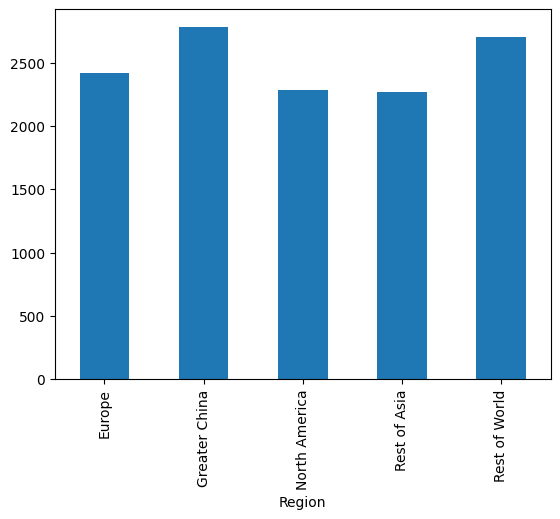

In [18]:
df.groupby('Region')['Services Revenue (in billion $)'].sum().plot(kind='bar', x='Region', y='Services Revenue (in billion $)')
plt.show()

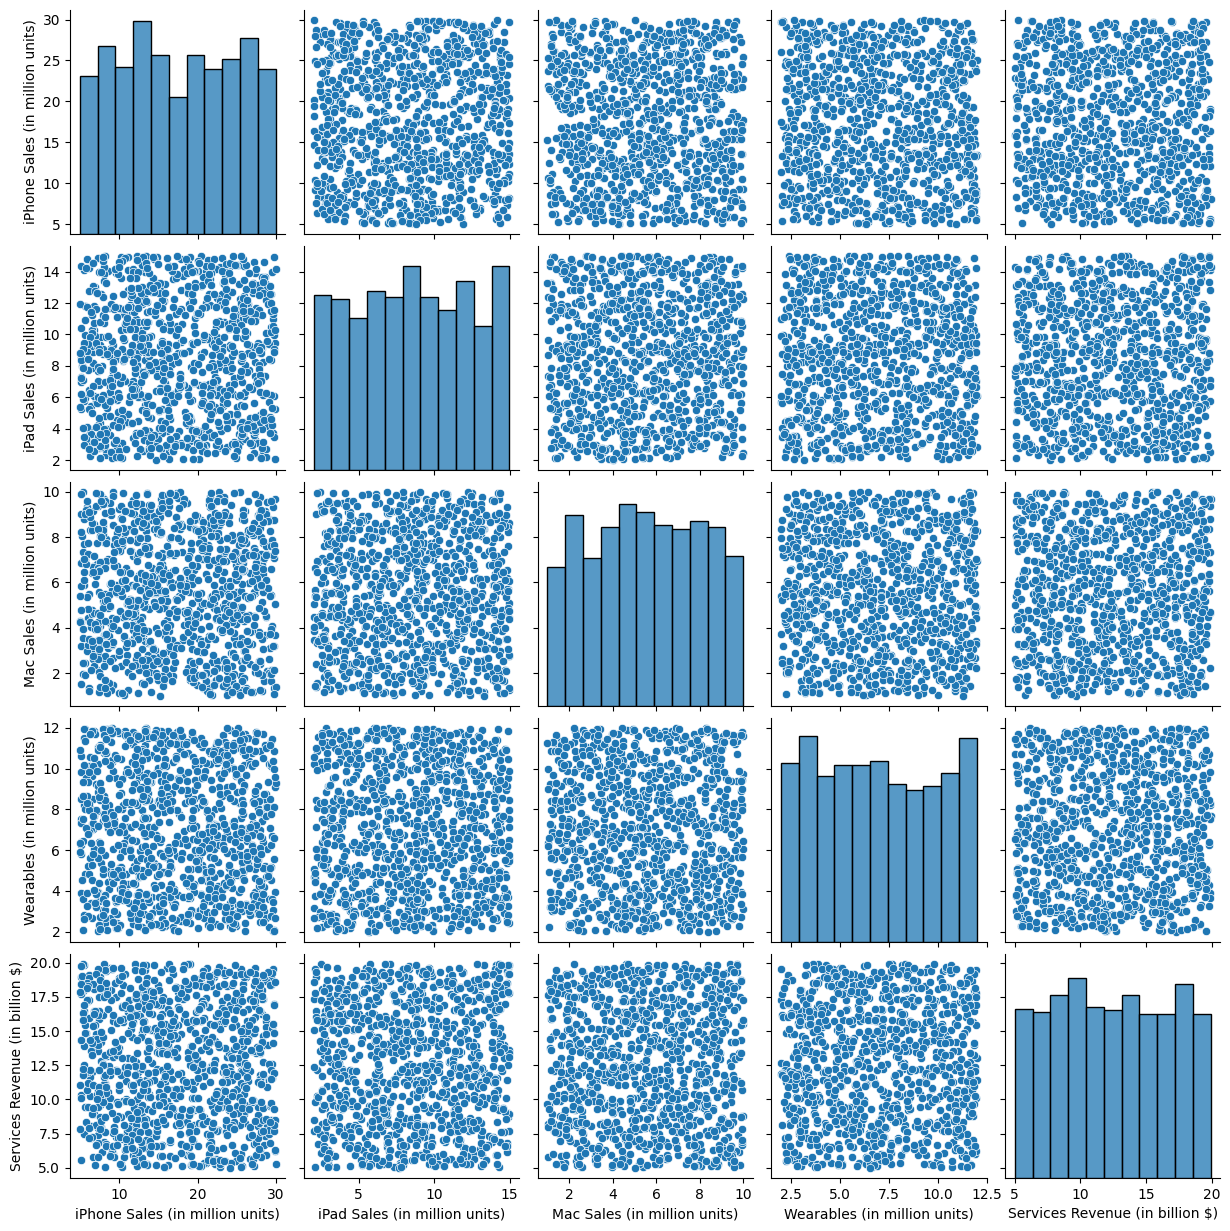

In [19]:
sns.pairplot(df)
plt.show()

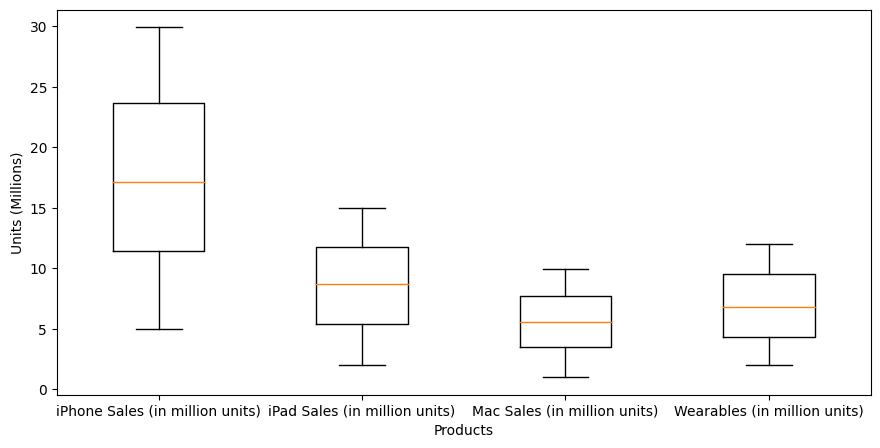

In [20]:
plt.figure(figsize=(10.5, 5))
plt.boxplot(df[['iPhone Sales (in million units)', 'iPad Sales (in million units)', 'Mac Sales (in million units)', 'Wearables (in million units)']])
plt.xticks([1, 2, 3, 4], ['iPhone Sales (in million units)', 'iPad Sales (in million units)', 'Mac Sales (in million units)', 'Wearables (in million units)'])
plt.xlabel('Products')
plt.ylabel('Units (Millions)')
plt.show()

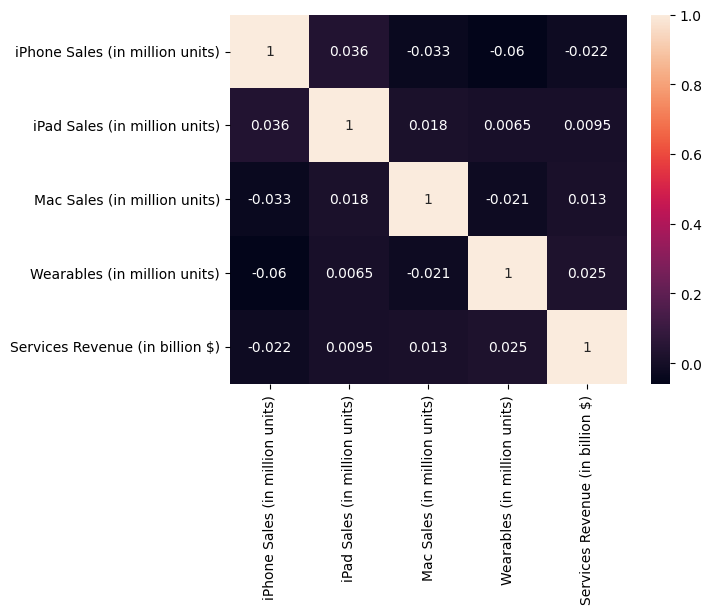

In [21]:
sns.heatmap(df_numerical.corr(), annot=True)
plt.show()

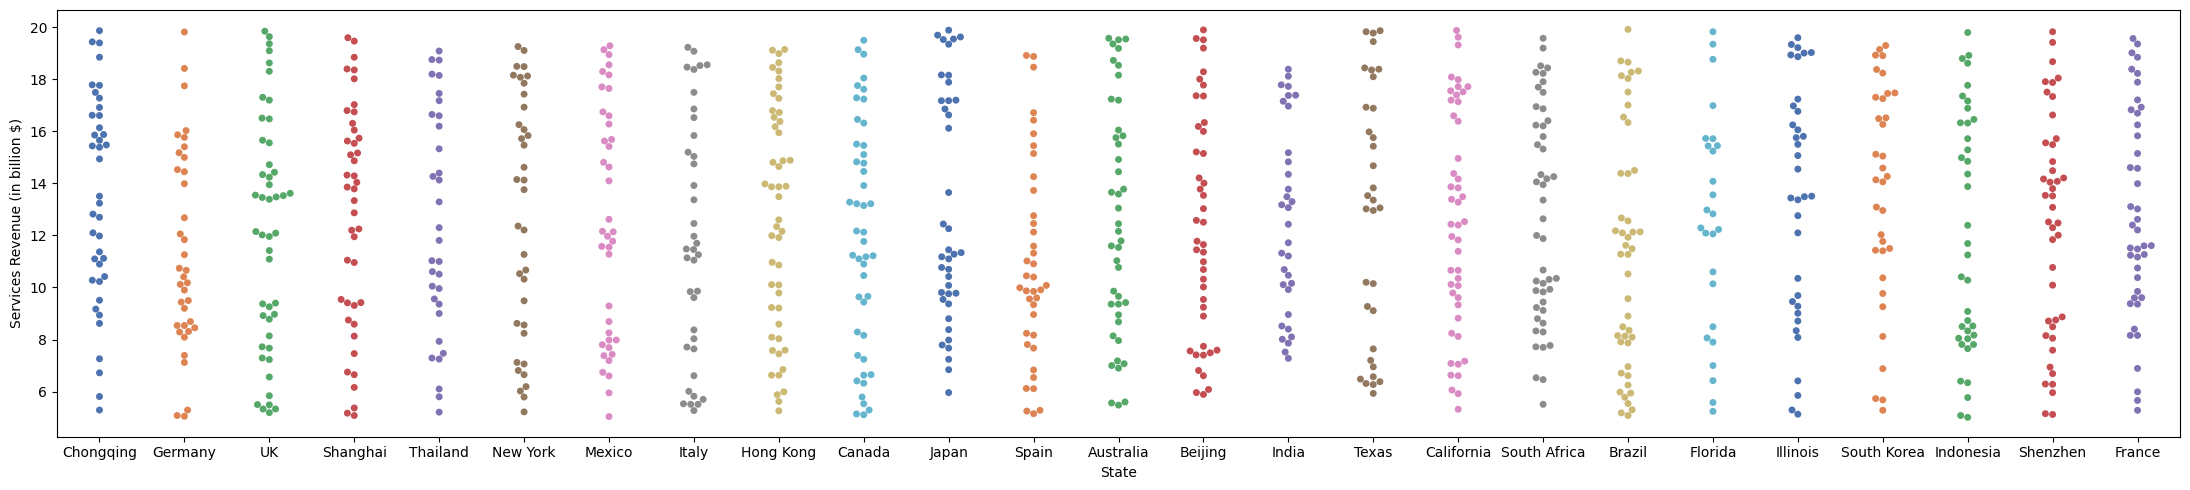

In [22]:
plt.figure(figsize=(22, 5))
sns.swarmplot(data=df,x='State', y='Services Revenue (in billion $)', palette='deep')
plt.tight_layout()
plt.show()

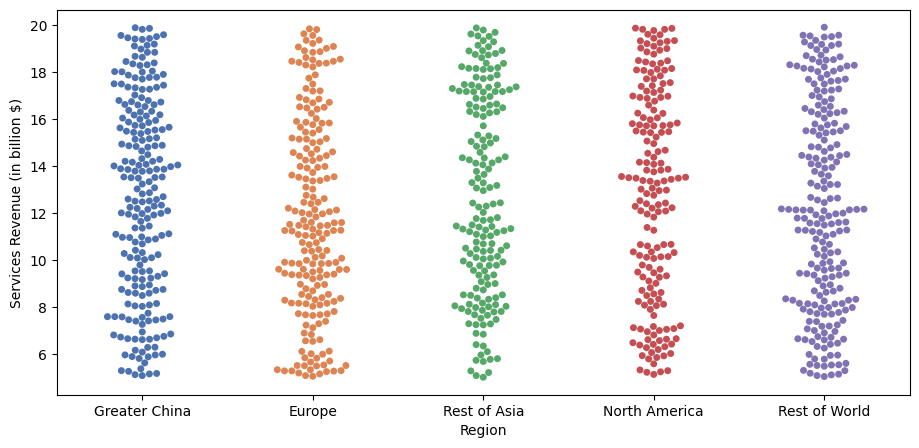

In [23]:
plt.figure(figsize=(11, 5))
sns.swarmplot(data=df,x='Region', y='Services Revenue (in billion $)', palette='deep')
plt.show()

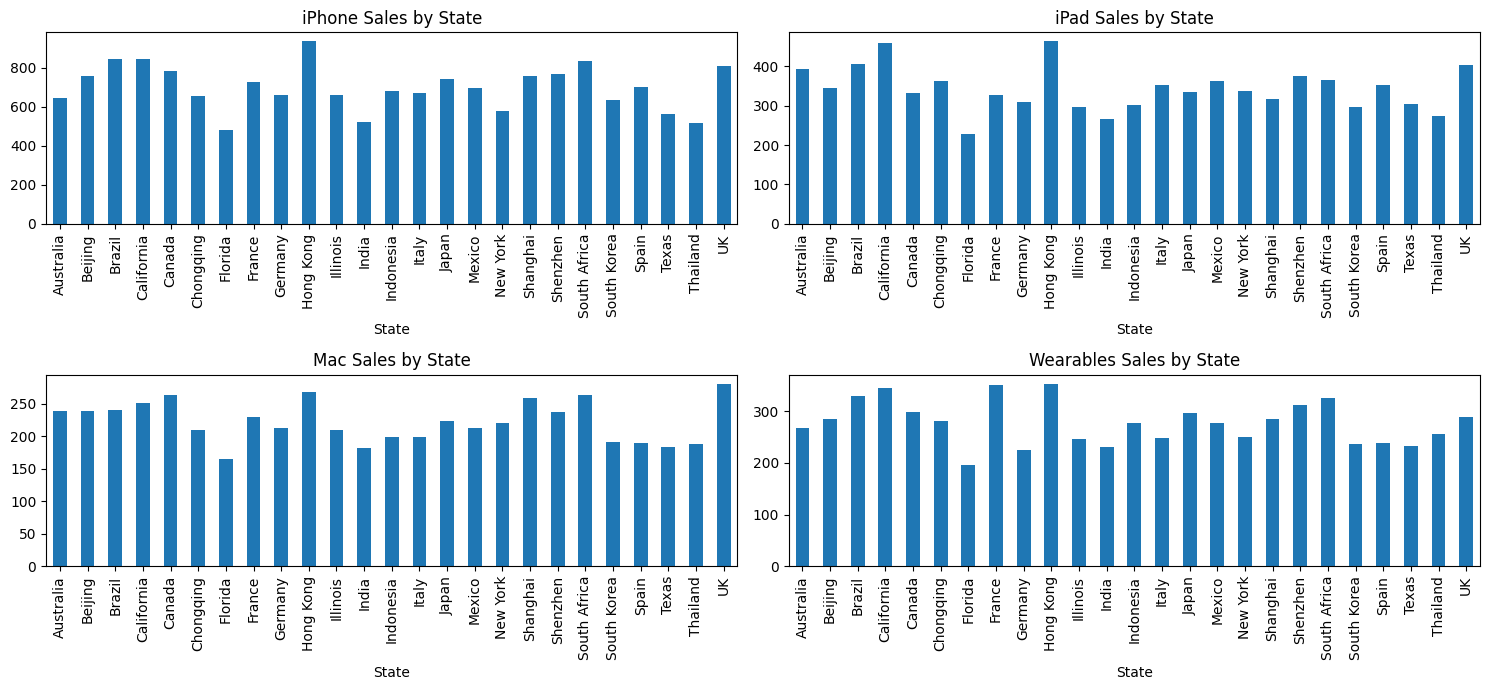

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))

df.groupby('State')['iPhone Sales (in million units)'].sum().plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('iPhone Sales by State')

df.groupby('State')['iPad Sales (in million units)'].sum().plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('iPad Sales by State')

df.groupby('State')['Mac Sales (in million units)'].sum().plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Mac Sales by State')

df.groupby('State')['Wearables (in million units)'].sum().plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Wearables Sales by State')

plt.tight_layout()
plt.show()

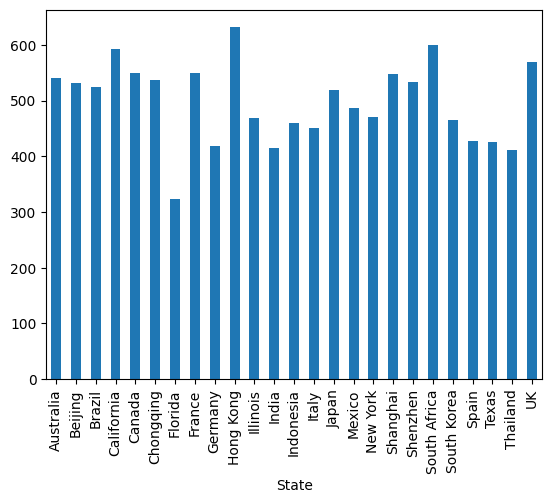

In [25]:
df.groupby('State')['Services Revenue (in billion $)'].sum().plot(kind='bar', x='Region', y='Services Revenue (in billion $)')
plt.show()

# Insights

- Boost Mac sales, since they are the lowest performing product line.
- Find ways to boost revenue in Florida, Germany, India, Texas, and Thailand, which have the lowest total revenue of their group. For example, offer promotions, boost advertising and marketing efforts, and find the root causes behind why the individual revenues of these places are so low.
- Specifically in Florida, find ways to boost sales throughout the entire product line.